<a href="https://colab.research.google.com/github/PaulBunkie/veo/blob/main/Comix2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Ставим правильную библиотеку (Vertex AI)
!pip install --upgrade google-cloud-aiplatform -q

# Вызываем системное окно авторизации Colab
from google.colab import auth
auth.authenticate_user()

# 2. Импортируем библиотеку, которую требует этот туториал
from google import genai

# 3. Создаем тот самый client, пуская его в обход блокировок ключей (через Vertex AI)
PROJECT_ID = "project-97440ad7-9594-40c4-826"

client = genai.Client(
    vertexai=True,
    project=PROJECT_ID,
    location="us-central1" # Модели Veo обычно лежат в этом регионе
)

print("Client успешно создан! Можно запускать генерацию.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 65.5 MB/s eta 0:00:00
Client успешно создан! Можно запускать генерацию.


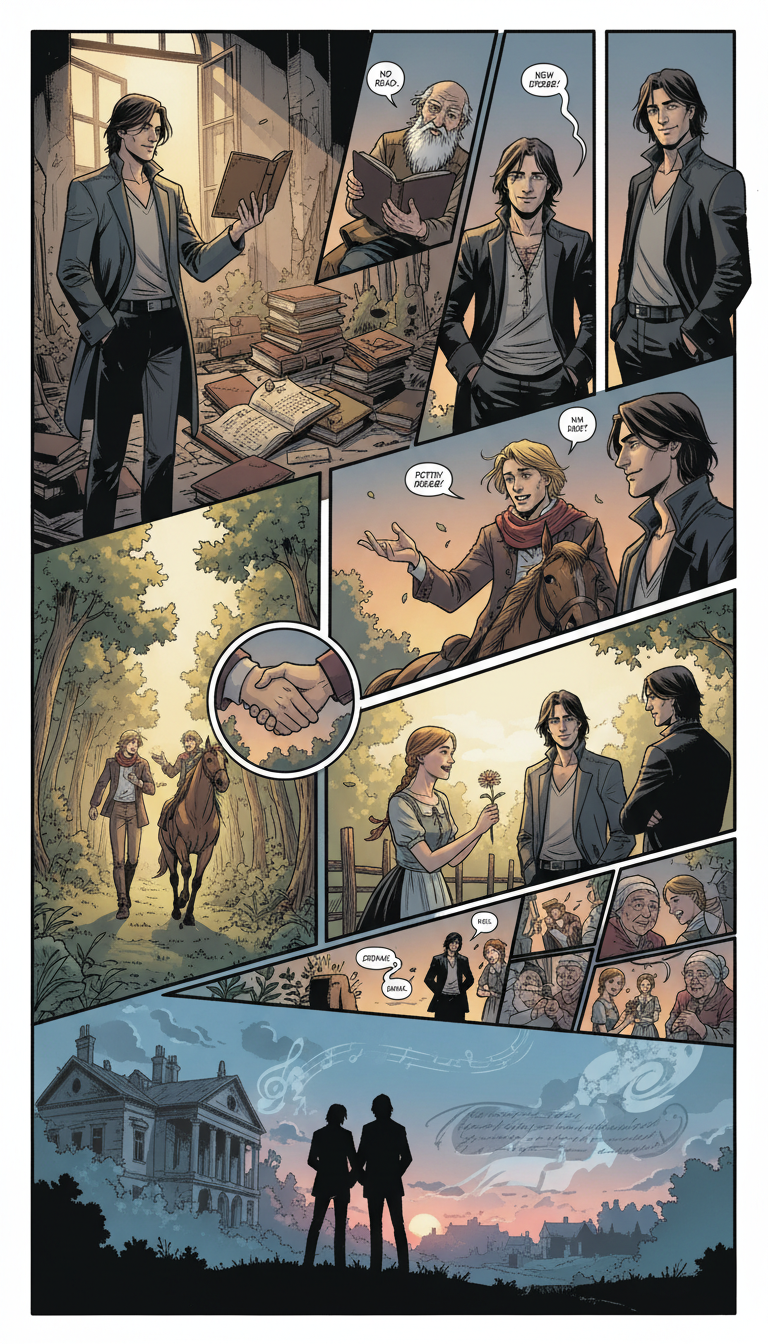

In [6]:
aspect_ratio="9:16"
from google.genai import types

# 2. Импортируем библиотеку, которую требует этот туториал
from google import genai

# 3. Создаем тот самый client, пуская его в обход блокировок ключей (через Vertex AI)
PROJECT_ID = "project-97440ad7-9594-40c4-826"

client = genai.Client(
    vertexai=True,
    project=PROJECT_ID,
    location="global"#"us-central1" ## Модели Veo обычно лежат в этом регионе
)

response = client.models.generate_content(
    model="gemini-2.5-flash-image",
    contents=["""
    Draw a dynamic modern comic adaptation of the text in 6–10 sequential panels. Short dialogue (1–3 words per bubble) allowed. No captions, no narration, no internal monologue, no long text.
    Do not use evenly spaced rectangular panels. Use an asymmetrical, contemporary layout with varied panel sizes, angled or overlapping frames, and occasional full-bleed panels.
    Tell the story through action, movement, body language, lighting, environment, and cinematic camera shifts (close-ups, wide shots, low angles, Dutch tilt).
    Each panel must show clear progression and escalating tension.
    Style: bold, kinetic, high-end modern graphic novel.

    TEXT:

Онегин поселился в своей усадьбе, где, среди запущенного сада и старого дома, он открыл тетради, нашёл календарь и otheritems, а рядом жил старик, почти не читавший книг. В деревню приехал новый сосед — Владимир Ленский, приехавший из Германии с поэтическими мечтами и восторженной речью. Ленский с восторгом рассказывал о новых идеях, о любви к искусству и о поиске смысла, тогда как Онегин отнесся к нему с лёгкой иронией, но всё же поддержал его. Друзья часто гуляли вместе, обсуждали поэзию, сравнивали стихи и пролучили взаимное уважение. Ленский влюбился в сестру Татьяну, простую девочку из соседней семьи, и стал её претендентом, тогда как Онегин, осторожный и размышляющий, наблюдал за их отношениями. Вокруг происходили обычаи деревенской жизни — браки, праздники и разговоры о судьбе, но среди них выделялась дружба двух молодых людей, полная поэтических размышлений и тихой грусти.

    """],
    config=types.GenerateContentConfig(
        response_modalities=["IMAGE"],
        image_config=types.ImageConfig(
            aspect_ratio=aspect_ratio,
        )
    )
)
for part in response.parts:
    if part.inline_data:
        moon_image = part.as_image()
        break
moon_image.show()
moon_image.save('moon_boy.jpg')